In [1]:
from graspy.utils import import_edgelist
from graspy.nominate import SpectralVN
import numpy as np

In [2]:
# datasets pre-converted from binary .mat datasets provided by paper to csv in matlab
adj = np.genfromtxt('../../../graspy/datasets/elegens_adj.csv', dtype=np.int, delimiter=',')
att = np.genfromtxt('../../../graspy/datasets/elegens_attributes.csv', dtype=np.int)

In [3]:
def sample():
    # seed with 10 S neurons (3), 20 I neurons (2), 30 M neurons (1)
    seed = [[],[]]

    motor_args = np.argwhere(att == 1).reshape(-1)
    motor_seed = np.random.choice(a=motor_args, size=30, replace=False)
    seed[0].extend(motor_seed)
    seed[1].extend([1]*30)

    inter_args = np.argwhere(att == 2).reshape(-1)
    inter_seed = np.random.choice(a=inter_args, size=20, replace=False)
    seed[0].extend(inter_seed)
    seed[1].extend([2]*20)

    sense_args = np.argwhere(att == 3).reshape(-1)
    sense_seed = np.random.choice(a=sense_args, size=10, replace=False)
    seed[0].extend(sense_seed)
    seed[1].extend([3]*10)

    seed = np.array(seed).T
    return seed

In [4]:
# loop over 1000 random trials to get good prob estimates
mn_correct_counts = np.zeros(len(att))
in_correct_counts = np.zeros(len(att))
sn_correct_counts = np.zeros(len(att))
for i in range(1000):
    # newly implemented SpectralVN class!
    svn = SpectralVN(mode='knn-weighted')
    seed = sample()
    svn.fit(adj, seed)
    nomination_list, dists = svn.predict(out='per_attribute')
    mn_correct_counts[np.argwhere(att[nomination_list.T[0]] == 1)] += 1
    in_correct_counts[np.argwhere(att[nomination_list.T[1]] == 2)] += 1
    sn_correct_counts[np.argwhere(att[nomination_list.T[2]] == 3)] += 1
mn_correct_prob = mn_correct_counts / 1000
in_correct_prob  = in_correct_counts / 1000
sn_correct_prob  = sn_correct_counts / 1000

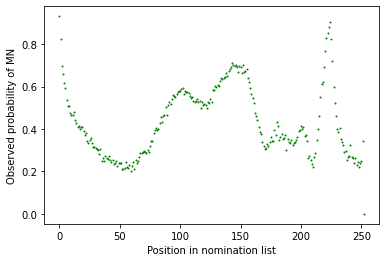

In [5]:
#remove vertices that were seeds
from matplotlib import pyplot as plt
plt.scatter(np.arange(mn_correct_prob.shape[0]), mn_correct_prob, s=1, color='green')
plt.xlabel('Position in nomination list')
plt.ylabel('Observed probability of MN')
plt.show()

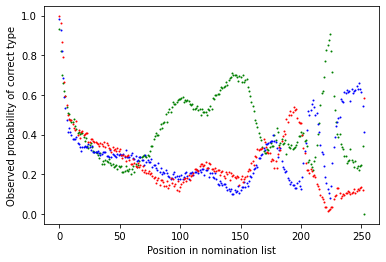

In [6]:
from matplotlib import pyplot as plt
plt.scatter(np.arange(mn_correct_prob.shape[0]), mn_correct_prob, s=1, color='green')
plt.scatter(np.arange(in_correct_prob.shape[0]), in_correct_prob, s=1, color='blue')
plt.scatter(np.arange(sn_correct_prob.shape[0]), sn_correct_prob, s=1, color='red')
plt.xlabel('Position in nomination list')
plt.ylabel('Observed probability of correct type')
plt.show()


In [10]:
correct_counts = np.zeros(len(att))
for i in range(1000):
    # newly implemented SpectralVN class!
    svn = SpectralVN(mode='knn-weighted')
    seed = sample()
    svn.fit(adj, seed)
    nomination_list, dists = svn.predict()
    correct_counts[np.argwhere(att[nomination_list.T[0]] == nomination_list.T[1])] += 1

correct_prob = correct_counts / 1000

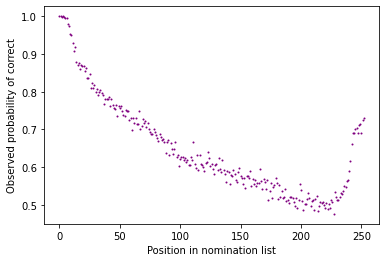

In [11]:
from matplotlib import pyplot as plt
plt.scatter(np.arange(correct_prob.shape[0]), correct_prob, s=1, color='purple')
plt.xlabel('Position in nomination list')
plt.ylabel('Observed probability of correct')
plt.show()
